# Bertin substrates roughing

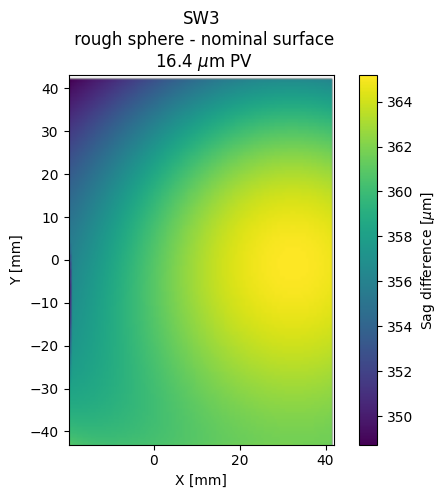

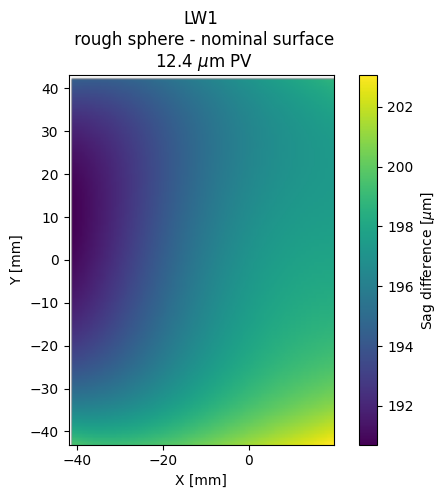

In [1]:
from optical import bertin_lw_sphericals, bertin_sw_sphericals, rectangular_lw_substrate, rectangular_sw_substrate
import matplotlib.pyplot as plt
import numpy as np

for type in ['SW', 'LW']:
    if type == 'LW':
        nominal = rectangular_lw_substrate
        sphericals = bertin_lw_sphericals
    else:
        nominal = rectangular_sw_substrate
        sphericals = bertin_sw_sphericals

    for spherical in sphericals:
        fig, ax = plt.subplots()
        difference = -1e3 * nominal.sag_from(spherical.surface)
        pv = np.nanmax(difference) - np.nanmin(difference)
        im = ax.imshow(difference, origin='lower', extent=nominal.limits)
        ax.set_xlabel('X [mm]')
        ax.set_ylabel('Y [mm]')
        ax.set_title(f'{spherical.name}\n rough sphere - nominal surface\n {pv:.1f} $\\mu$m PV')
        cb = fig.colorbar(im)
        cb.set_label(r"Sag difference [$\\mu$m]")